In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!pip show matplotlib

Name: matplotlib
Version: 3.1.0
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.6/dist-packages
Requires: numpy, python-dateutil, pyparsing, cycler, kiwisolver
Required-by: yellowbrick, stable-baselines, seaborn, scikit-image, plotnine, pandas-profiling, mlxtend, mizani, missingno, matplotlib-venn, magenta, keras-vis, imgaug, fbprophet, fastai, descartes, daft


In [0]:
import pandas as pd
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier

In [0]:
nba_df = pd.read_csv('/content/drive/My Drive/nba.csv')

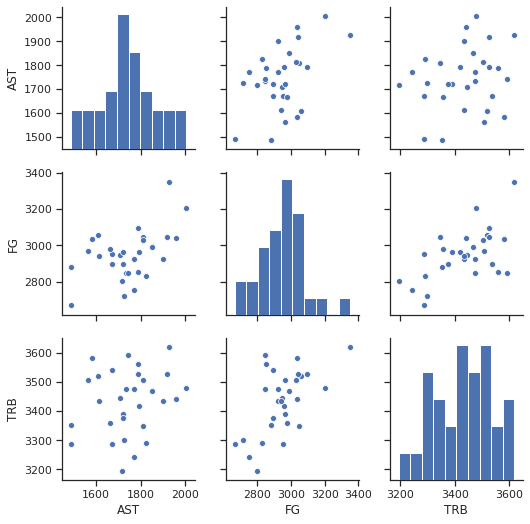

In [0]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(nba_df[["AST", "FG", "TRB"]])
plt.show()

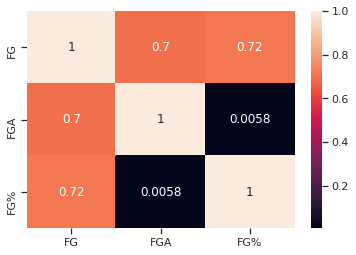

In [0]:
correlation = nba_df[["FG", "FGA", "FG%" ]].corr()
sns.heatmap(correlation, annot=True)

In [0]:

season_matches_df = pd.read_csv('/content/drive/My Drive/season.csv')

In [0]:
playoff_matches_df = pd.read_csv('/content/drive/My Drive/playoffs.csv')

In [0]:
nba_df_per_minute = nba_df.drop(columns=['Rk', 'FG%','3P%', '2P%', 'FT%'])
nba_df_per_minute['TOV'] = -nba_df_per_minute['TOV']
nba_df_per_minute['PF'] = -nba_df_per_minute['PF']
nba_df_per_minute['Team'] = nba_df_per_minute['Team'].map(lambda x : x.replace("*", ""))

In [0]:
def add_winner(row):
  if (row['PTS'] > row['PTS.1']):
    return 1
  return 2
  

team1_vs_team2 = season_matches_df[['Visitor/Neutral', 'Home/Neutral' ]] 
team1_vs_team2.columns = ['team1','team2']
team1_vs_team2['winner'] = season_matches_df.apply (lambda row: add_winner(row), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [0]:
def create_column(column_name, row):
  team1_row = nba_df_per_minute.loc[nba_df_per_minute['Team'] == row['team1']]
  team2_row = nba_df_per_minute.loc[nba_df_per_minute['Team'] == row['team2']]
  return team1_row[column_name].tolist()[0] - team2_row[column_name].tolist()[0]

for columnname in nba_df_per_minute.columns[3:]:
  team1_vs_team2[columnname] = team1_vs_team2.apply(lambda row: create_column(columnname, row), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [0]:
X = team1_vs_team2.loc[:,'FG':]
X=(X-X.min())/(X.max()-X.min())
y = team1_vs_team2['winner']

In [0]:
X_cov_matrix = X.cov()
eigen_values, eigen_vectors = np.linalg.eig(X_cov_matrix)


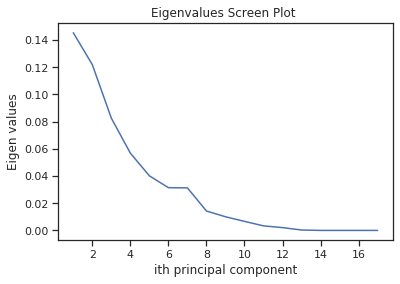

In [0]:
comps = [ i + 1 for i in range(len(eigen_values))] 
var = eigen_values
# plotting the points 
plt.plot(comps, var) 

plt.xlabel('ith principal component') 
plt.ylabel('Eigen values') 

# # giving a title to my graph 
plt.title('Eigenvalues Screen Plot ') 

# # function to show the plot 
plt.show() 

In [0]:
X = X.dot(eigen_vectors[:,:8])

In [0]:
clf = LogisticRegression().fit(X, y)
# preds = clf.predict(X)
# print(preds)
# print(classification_report(y, preds))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X,y)
# preds = nb.predict(X)
# print(preds)
# print(classification_report(y, preds))


GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=45, max_depth=2, random_state=0)
rfc.fit(X,y)
# preds = rfc.predict(X)
# print(preds)
# print(classification_report(y, preds))


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=45,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
abc = AdaBoostClassifier(n_estimators=25, learning_rate=0.1)
abc.fit(X, y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=25, random_state=None)

In [0]:
dtc = DecisionTreeClassifier(criterion="gini", max_depth=3)
dtc.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
#Test data
playoff_matches_df.columns = season_matches_df.columns

team1_vs_team2_test = playoff_matches_df[['Visitor/Neutral', 'Home/Neutral' ]] 
team1_vs_team2_test.columns = ['team1','team2']
team1_vs_team2_test['winner'] = playoff_matches_df.apply (lambda row: add_winner(row), axis=1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [0]:
res = defaultdict(int)
def convert_to_dict(row):
    res[(row['team1'], row['team2'])] += 1 if row['winner'] == 1 else -1

team1_vs_team2_test.apply(lambda row: convert_to_dict(row), axis = 1)
final_res = defaultdict()
removedkeys=set()
for key, value in res.items():
  if key not in removedkeys:
    final_res[(key[0], key[1])] = value - res[(key[1], key[0])]
    removedkeys.add((key[1], key[0]))
  

In [0]:
team1_vs_team2_res = pd.DataFrame(columns = team1_vs_team2_test.columns)
for key, value in final_res.items():
  team1_vs_team2_res = team1_vs_team2_res.append({'team1': key[0], 'team2': key[1], 'winner': 1 if value > 0 else 2}, ignore_index=True)

In [0]:
for columnname in nba_df_per_minute.columns[3:]:
  team1_vs_team2_res[columnname] = team1_vs_team2_res.apply(lambda row: create_column(columnname, row), axis=1)

In [0]:
team1_vs_team2_res['winner'] = pd.to_numeric(team1_vs_team2_res['winner'])
X_test = team1_vs_team2_res.loc[:,'FG':]

X_test=(X_test-X_test.min())/(X_test.max()-X_test.min())
y_test = team1_vs_team2_res['winner']

X_test = X_test.dot(eigen_vectors[:,:8])

In [0]:
preds_test=clf.predict(X_test)
print(preds_test)
print(classification_report(y_test, preds_test))

[2 1 1 2 1 2 2 2 2 2 1 2 2 2 2]
              precision    recall  f1-score   support

           1       0.50      0.50      0.50         4
           2       0.82      0.82      0.82        11

    accuracy                           0.73        15
   macro avg       0.66      0.66      0.66        15
weighted avg       0.73      0.73      0.73        15



In [0]:
preds_test=rfc.predict(X_test)
print(preds_test)
print(classification_report(y_test, preds_test))

[2 1 1 2 1 2 2 2 2 2 2 1 2 2 2]
              precision    recall  f1-score   support

           1       0.50      0.50      0.50         4
           2       0.82      0.82      0.82        11

    accuracy                           0.73        15
   macro avg       0.66      0.66      0.66        15
weighted avg       0.73      0.73      0.73        15



In [0]:
preds_test=nb.predict(X_test)
print(preds_test)
print(classification_report(y_test, preds_test))

[2 1 1 2 1 2 2 2 2 2 1 1 2 2 2]
              precision    recall  f1-score   support

           1       0.40      0.50      0.44         4
           2       0.80      0.73      0.76        11

    accuracy                           0.67        15
   macro avg       0.60      0.61      0.60        15
weighted avg       0.69      0.67      0.68        15



In [0]:
preds_test=dtc.predict(X_test)
print(preds_test)
print(classification_report(y_test, preds_test))

[2 2 2 2 1 2 2 2 1 2 2 2 2 2 2]
              precision    recall  f1-score   support

           1       0.50      0.25      0.33         4
           2       0.77      0.91      0.83        11

    accuracy                           0.73        15
   macro avg       0.63      0.58      0.58        15
weighted avg       0.70      0.73      0.70        15



In [0]:
preds_test=abc.predict(X_test)
print(preds_test)
print(classification_report(y_test, preds_test))

[2 1 2 2 1 2 2 2 2 2 2 2 2 2 1]
              precision    recall  f1-score   support

           1       0.67      0.50      0.57         4
           2       0.83      0.91      0.87        11

    accuracy                           0.80        15
   macro avg       0.75      0.70      0.72        15
weighted avg       0.79      0.80      0.79        15

